In [2]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
import numpy as np
import h5py
#from chainconsumer import ChainConsumer
from corner import corner

/home/users/swmclau2/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
! ls -ltr /scratch/users/swmclau2/*.hdf5

-rw-rw-r-- 1 swmclau2 risahw    3937367623 Sep 14 11:33 /scratch/users/swmclau2/DES_emu.hdf5
-rw-rw-r-- 1 swmclau2 risahw     794838268 Sep 14 11:33 /scratch/users/swmclau2/abmatched_halos.hdf5
-rw-r--r-- 1 swmclau2 risahw      42004192 Nov  1 11:33 /scratch/users/swmclau2/test_halo_vmax@mpeak_smf_sham.hdf5
-rw-r--r-- 1 swmclau2 risahw     169836168 Dec  5 16:31 /scratch/users/swmclau2/test_MDPL2_halo_vpeak_smf_sham.hdf5
-rw-r--r-- 1 swmclau2 risahw      69507967 Jan  9 06:36 /scratch/users/swmclau2/HOD_wp_ds_rmin_None_HOD.hdf5
-rw-r--r-- 1 swmclau2 risahw      44004192 Jan 24 17:06 /scratch/users/swmclau2/test_MDPL2_halo_vpeak_smf_sham_nfwized.hdf5
-rw-r--r-- 1 swmclau2 risahw 1331948510756 Jan 27 15:19 /scratch/users/swmclau2/gaiadr2.hdf5
-rw-r--r-- 1 swmclau2 risahw         51806 Feb  7 09:20 /scratch/users/swmclau2/hod_recovery_test1.hdf5
-rw-r--r-- 1 swmclau2 risahw        617795 Feb  9 09:38 /scratch/users/swmclau2/hod_recovery_test2.hdf5
-rw-r--r-- 1 swmclau2 risahw    443201304

In [5]:
from collections import OrderedDict
hod_param_bounds = OrderedDict({'logMmin': (13.0, 14.0),
                    'sigma_logM': (0.05, 0.5),
                    'alpha': (0.85, 1.15),
                    'logM0': (12.5, 14.5),
                    'logM1': (13.5, 15.5)} )

In [6]:
#fname = '/scratch/users/swmclau2/PearceMCMC/500_walkers_10000_steps_chain_cosmo_zheng_xi_lowmsat.npy'
fname = '/scratch/users/swmclau2/hod_recovery_test3.hdf5'

In [7]:
f = h5py.File(fname, 'r')

In [8]:
f.attrs.keys()

[u'boxno',
 u'r_bins',
 u'true_point',
 u'hod_pnames',
 u'cov',
 u'y',
 u'nwalkers',
 u'nsteps']

In [9]:
from ast import literal_eval

In [10]:
f.keys()

[u'chain']

In [11]:
n_walkers = f.attrs['nwalkers']

In [12]:
n_burn = 1000
chain = f['chain'][n_burn*n_walkers:]

In [13]:
chain = chain[np.all(chain!=0.0, axis = 1), :]

In [14]:
print chain.shape, chain.shape[0]/n_walkers

(44420, 5) 2221


In [15]:
f.attrs.keys()

[u'boxno',
 u'r_bins',
 u'true_point',
 u'hod_pnames',
 u'cov',
 u'y',
 u'nwalkers',
 u'nsteps']

In [16]:
true_vals = f.attrs['true_point']

In [17]:
chain_pnames = f.attrs['hod_pnames']

In [18]:
chain_pnames

array(['logM0', 'sigma_logM', 'logMmin', 'logM1', 'alpha'], dtype='|S10')

In [19]:
param_name_dict = {'ombh2': r'$\Omega_b h^2$', 'omch2': r'$\Omega_c h^2$','w0': r'$w_0$','ns': r'$n_s$', \
                   'ln10As': r'$\ln(10A_s)$', 'H0': r'$H_0$','Neff': r'$N_{eff}$',\
               'mean_occupation_centrals_assembias_corr1': r'$\rho_{cen}$',\
                 'mean_occupation_satellites_assembias_corr1':r'$\rho_{sat}$',\
                   'mean_occupation_centrals_assembias_param1': r'$\mathcal{A}_{cen}$',\
                 'mean_occupation_satellites_assembias_param1':r'$\mathcal{A}_{sat}$',\
                   'mean_occupation_centrals_assembias_slope1': r'$\mathcal{B}_{cen}$',\
                 'mean_occupation_satellites_assembias_slope1':r'$\mathcal{B}_{sat}$',\
                   'logM1': r'$\log(M_1)$','logM0': r'$\log(M_0)$','sigma_logM': r'$\sigma_{\log M }$',
                   'conc_gal_bias': r'$\eta$', 'alpha':r'$\alpha$', 'logMmin': r'$\log M_{min}$'}

In [20]:
hod_param_names = []
cosmo_param_names = []
cosmo_names = set(['ombh2', 'omch2', 'w0', 'ns', 'ln10As', 'H0', 'Neff'])
for pname in chain_pnames:
    if pname in cosmo_names:
        cosmo_param_names.append(param_name_dict[pname])
    else:
        
        hod_param_names.append(param_name_dict[pname])

In [21]:
f.close()

In [22]:
cosmo_param_names

[]

In [23]:
n_params = chain.shape[1] if len(chain.shape) > 1 else 1

In [24]:
MAP = chain.mean(axis = 0)
print MAP

[13.584263   0.2546724 13.575958  14.5821     1.0298443]


In [25]:
hod_idxs = np.array(range(len(cosmo_param_names), len(cosmo_param_names)+len(hod_param_names)))
cosmo_idxs = np.array(range(len(cosmo_param_names)))

In [26]:
if chain.shape[1] == 7:
    cosmo_chain = chain
elif chain.shape[1] > 10:
    hod_chain = chain[:,hod_idxs]
    cosmo_chain = chain[:,cosmo_idxs]
else:
    hod_chain = chain

In [27]:
true_vals

array([13.7714114 ,  0.23344583, 13.55366074, 14.28763409,  1.01036471])

In [28]:
hod_param_names

['$\\log(M_0)$',
 '$\\sigma_{\\log M }$',
 '$\\log M_{min}$',
 '$\\log(M_1)$',
 '$\\alpha$']

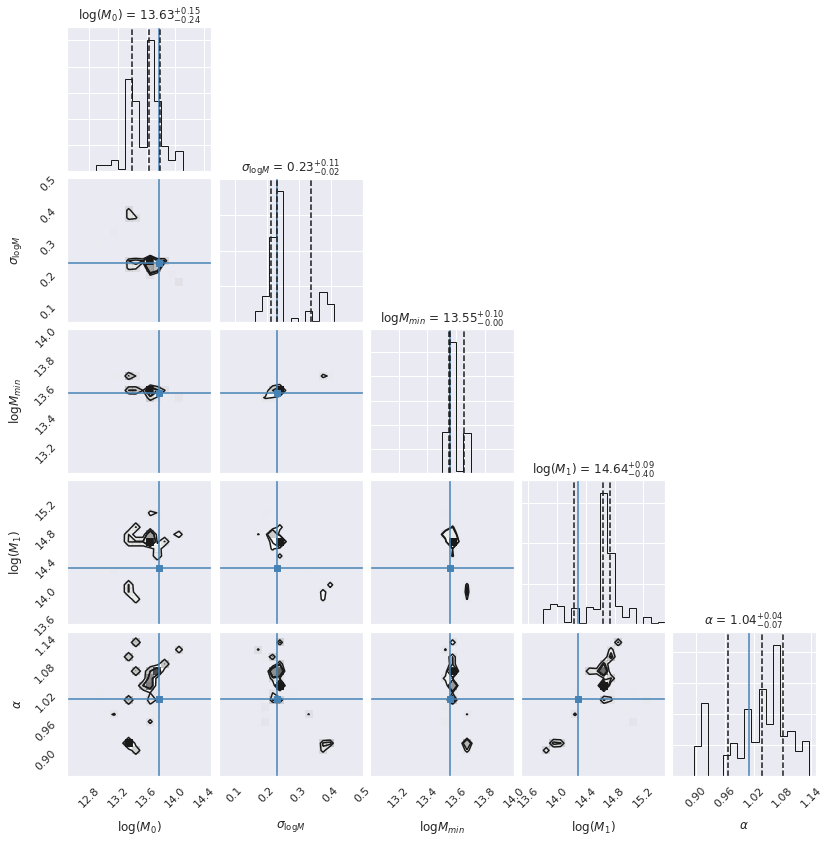

In [81]:
corner(hod_chain, labels=hod_param_names,
                       range = hod_param_bounds.values(),
                       quantiles=[0.16, 0.5, 0.84],
                        truths = true_vals,
                       #range = [emu.get_param_bounds(n) for n in hod_params],
                       show_titles=True, title_kwargs={"fontsize": 12},
                      plot_datapoints =False, plot_density = True);

In [82]:
from pearce.mocks.kittens import TrainingBox

In [83]:
f = h5py.File(fname, 'r')

In [84]:
true_data = f.attrs['y']
true_cov = f.attrs['cov']
yerr = np.sqrt(np.diag(true_cov))

In [85]:
cat = TrainingBox(f.attrs['boxno'])

In [86]:
f.close()

In [87]:
cat.load(1.0, 'zheng07')

In [88]:
MAP_param_dict = dict(zip(chain_pnames, MAP))
true_param_dict = dict(zip(chain_pnames, true_vals))

In [89]:
cat.populate(MAP_param_dict) # there's a bug in this, results coming out different than truth in the file. 

In [90]:
r_bins = np.logspace(-1, 1.6, 19)
map_vdf = cat.calc_vdf(r_bins)

In [91]:
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [92]:
map_vdf

array([0.00000000e+00, 1.12339355e-06, 7.86375483e-06, 2.19061742e-05,
       5.67313741e-05, 1.58960187e-04, 4.20149187e-04, 1.09699380e-03,
       2.84555586e-03, 7.54246428e-03, 1.94324616e-02, 4.88833468e-02,
       1.17804103e-01, 2.60900288e-01, 5.07284084e-01, 8.01236856e-01,
       9.74160263e-01, 9.99719713e-01])

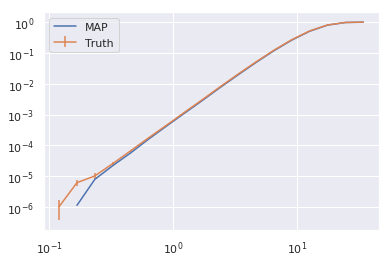

In [93]:
plt.plot(rbc, map_vdf, label = 'MAP')
plt.errorbar(rbc, true_data,yerr=yerr, label = 'Truth')
plt.legend(loc='best')
plt.loglog();
#plt.xscale('log')